In [1]:
import numpy as np
import pImpactR as impact
import matplotlib.pyplot as plt
from copy import deepcopy as copy
int = np.vectorize(int)
cmap = plt.get_cmap('rainbow')

In [2]:
NL_L = 1.8
NL_c = 0.01
NL_t = 0.4
NL_nu= 0.3034496449165134

npt_Test = 3834

In [3]:
beam, lattice = impact.readInputFile('../../test_toymodel.in')
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

betx = NL_L/np.sin(2.0*np.pi*NL_nu)
alfx = np.tan(np.pi*NL_nu)

reading ImpactZ input file (../../test_toymodel.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
print(betx,alfx)

1.9065054393933862 1.4082261727304293


In [5]:
def normalize(data,sign=1):
    data[:,1] = (data[:,0]*sign*alfx/np.sqrt(betx) + data[:,1]*np.sqrt(betx))/NL_c
    data[:,3] = (data[:,2]*sign*alfx/np.sqrt(betx) + data[:,3]*np.sqrt(betx))/NL_c
    data[:,0] = data[:,0]/(np.sqrt(betx)*NL_c)
    data[:,2] = data[:,2]/(np.sqrt(betx)*NL_c)
    
def unnormalize(data,sign=1):
    data[:,1] = (-data[:,0]*sign*alfx + data[:,1])*NL_c/np.sqrt(betx)
    data[:,3] = (-data[:,2]*sign*alfx + data[:,3])*NL_c/np.sqrt(betx)
    data[:,0] = data[:,0]*np.sqrt(betx)*NL_c
    data[:,2] = data[:,2]*np.sqrt(betx)*NL_c

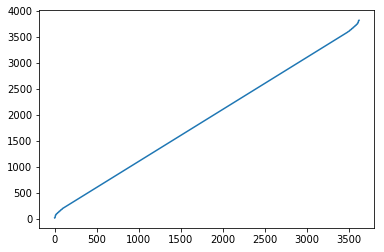

In [6]:
tmp = impact.readParticleData(300005,ke,mass,freq,format_id=2)[:npt_Test+1,:]
Index = np.argwhere(tmp[:,-1]<=npt_Test)[:,0]
Index = tmp[Index,-1]
plt.plot(Index)

In [7]:
pDataEntrance = [0]*6
for i in range(6):
    tmp = impact.readParticleData(300000+i,ke,mass,freq,format_id=2)[:npt_Test+1,:]
    tmp_index = np.in1d(tmp[:,-1],Index)
    tmp = tmp[tmp_index,:]
    normalize(tmp)
    X = tmp[:,0]-1j*tmp[:,1]
    Y = tmp[:,2]-1j*tmp[:,3]
    pDataEntrance[i] = {'X':X,'Y':Y}

In [8]:
pDataExit = [0]*5
for i in range(5):
    tmp = impact.readParticleData(200000+i,ke,mass,freq,format_id=2)[:npt_Test,:]
    tmp_index = np.in1d(tmp[:,-1],Index)
    tmp = tmp[tmp_index,:]
    normalize(tmp,-1)
    X = tmp[:,0]-1j*tmp[:,1]
    Y = tmp[:,2]-1j*tmp[:,3]
    pDataExit[i] = {'X':X,'Y':Y}

In [9]:
Mu = {}
for j in range(5):
    X1 = pDataExit[j]['X']
    X2 = pDataEntrance[j+1]['X'] 
    MuX = (np.angle(X2)-np.angle(X1))/np.pi/2.0
    for i in range(len(MuX)):
        if MuX[i]<-0.5:
            MuX[i]=MuX[i]+1.0
        if MuX[i]>0.5:
            MuX[i]=MuX[i]-1.0
            
    Y1 = pDataExit[j]['Y']
    Y2 = pDataEntrance[j+1]['Y'] 
    MuY = (np.angle(Y2)-np.angle(Y1))/np.pi/2.0
    for i in range(len(MuY)):
        if MuY[i]<-0.5:
            MuY[i]=MuY[i]+1.0
        if MuY[i]>0.5:
            MuY[i]=MuY[i]-1.0
    
    Mu[str(j)]={'mux':MuX,'muy':MuY}

    
    
MuX = Mu['0']['mux']
for i in range(1,5):
    MuX = MuX+Mu[str(i)]['mux']
MuX = MuX/5.0   
    
MuY = Mu['0']['muy']
for i in range(1,5):
    MuY = MuY+Mu[str(i)]['muy']
MuY = MuY/5.0   

Mu['ave[0~5]']={'mux':MuX,'muy':MuY}

In [10]:
X = pDataEntrance[0]['X'].real
Y = pDataEntrance[0]['Y'].real

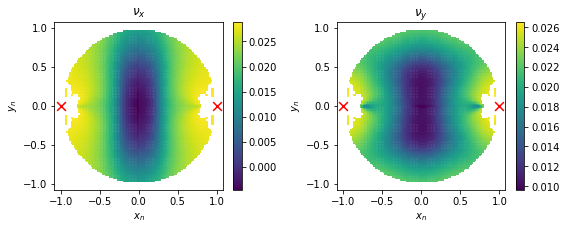

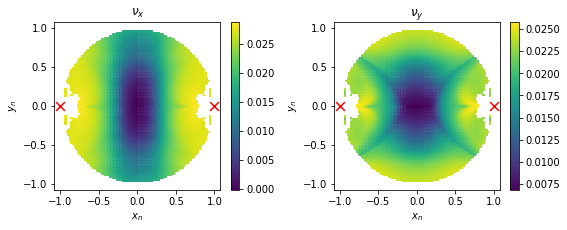

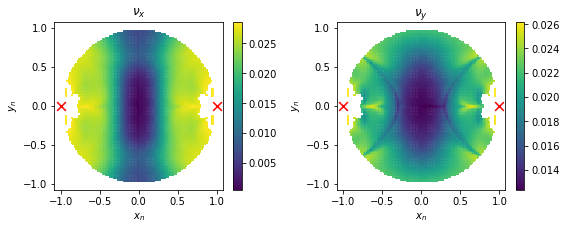

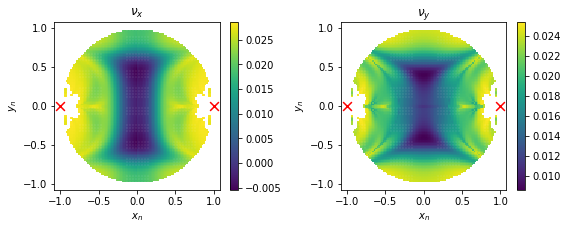

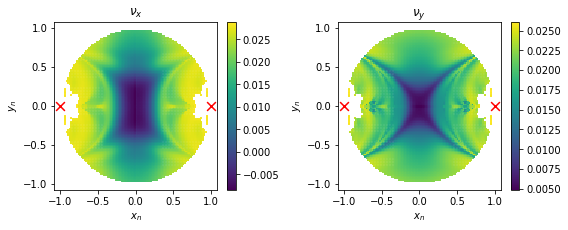

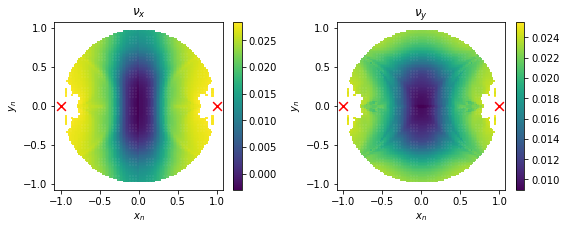

In [11]:
turn = 0
for turn in range(5):
    turn = str(turn)
    plt.figure(figsize=[8,3.3])
    plt.subplot(1,2,1)
    f1=plt.scatter(X,Y,c=Mu[turn]['mux'],s=1.6,marker='s')
    plt.scatter(X,-Y,c=Mu[turn]['mux'],s=1.6,marker='s')
    plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
    plt.xlim(-0.98*1.1,0.98*1.1)
    plt.ylim(-0.98*1.1,0.98*1.1)
    plt.title(r'$\nu_x$')
    plt.xlabel('$x_n$')
    plt.ylabel('$y_n$')
    plt.colorbar(f1)

    plt.subplot(1,2,2)
    f1=plt.scatter(X,Y,c=Mu[turn]['muy'],s=1.6,marker='s')
    plt.scatter(X,-Y,c=Mu[turn]['muy'],s=1.6,marker='s')
    plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
    plt.xlim(-0.98*1.1,0.98*1.1)
    plt.ylim(-0.98*1.1,0.98*1.1)
    plt.title(r'$\nu_y$')
    plt.xlabel('$x_n$')
    plt.ylabel('$y_n$')
    plt.colorbar(f1)
    plt.tight_layout()
    plt.savefig('Realistic.mu_over_arc.at_turn='+str(turn)+'.png',dpi=180)

    
turn='ave[0~5]'
plt.figure(figsize=[8,3.3])
plt.subplot(1,2,1)
f1=plt.scatter(X,Y,c=Mu[turn]['mux'],s=1.6,marker='s')
plt.scatter(X,-Y,c=Mu[turn]['mux'],s=1.6,marker='s')
plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
plt.xlim(-0.98*1.1,0.98*1.1)
plt.ylim(-0.98*1.1,0.98*1.1)
plt.title(r'$\nu_x$')
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.colorbar(f1)

plt.subplot(1,2,2)
f1=plt.scatter(X,Y,c=Mu[turn]['muy'],s=1.6,marker='s')
plt.scatter(X,-Y,c=Mu[turn]['muy'],s=1.6,marker='s')
plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
plt.xlim(-0.98*1.1,0.98*1.1)
plt.ylim(-0.98*1.1,0.98*1.1)
plt.title(r'$\nu_y$')
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.colorbar(f1)
plt.tight_layout()
# plt.figure(figsize=[8,3.3])
# plt.subplot(1,2,1)
# mux = Mu[0]['mux']
# for i in range(1,5):
#     mux = mux+Mu[i]['mux']
# mux = mux/5.0    
# f1=plt.scatter(X,Y,c=mux,s=1.6,marker='s')
# plt.scatter(X,-Y,c=mux,s=1.6,marker='s')
# plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
# plt.xlim(-0.98*1.1,0.98*1.1)
# plt.ylim(-0.98*1.1,0.98*1.1)
# plt.title(r'$\nu_x$')
# plt.xlabel('$x_n$')
# plt.ylabel('$y_n$')
# plt.colorbar(f1)

# plt.subplot(1,2,2)
# muy = Mu[0]['muy']
# for i in range(1,5):
#     muy = muy+Mu[i]['muy']
# muy = muy/5.0    
# f1=plt.scatter(X,Y,c=muy,s=1.6,marker='s')
# plt.scatter(X,-Y,c=muy,s=1.6,marker='s')
# plt.scatter([-1.0,1.0],[0.0,0.0],c='r',s=77,marker='x')
# plt.xlim(-0.98*1.1,0.98*1.1)
# plt.ylim(-0.98*1.1,0.98*1.1)
# plt.title(r'$\nu_y$')
# plt.xlabel('$x_n$')
# plt.ylabel('$y_n$')
# plt.colorbar(f1)
# plt.tight_layout()
plt.savefig('Realistic.mu_over_arc.at_turn=0-5.png',dpi=180)

In [12]:
tmp = impact.readParticleData(300000,ke,mass,freq,format_id=2)[:npt_Test+1,:]
tmp_index = np.in1d(tmp[:,-1],Index)
pData = tmp[tmp_index,:]
normalize(pData)

import pickle
data = {'pData':pData,
        'Mu':Mu}
pickle.dump(data,open('tune_advance.pickle','wb'))